In [1]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

### Note 2014 = base year

In [2]:
inputs = r'.\inputs_normal__'
outputs = r'.\outputs'

In [3]:
# field must be 'TOTHH', 'HHPOP', 'TOTEMP'
def create_county_dataframe(field, export=False):
    
    # create empty list
    rows = []
    
    # get list of files
    csvs = glob.glob(os.path.join(inputs, '*SE_WF_*.csv'))
    for csv in csvs:

        # get the year
        year= csv[24:28]

        # read in table
        df = pd.read_csv(csv)
        
        # aggregate by county
        df = df.groupby('CO_NAME')[['TOTHH', 'HHPOP', 'TOTEMP']].sum().reset_index()
        
        # get value for each county
        davis = float(df[df['CO_NAME']== 'DAVIS'][field])
        saltlake = float(df[df['CO_NAME']== 'SALT LAKE'][field])
        utah = float(df[df['CO_NAME']== 'UTAH'][field])
        weber = float(df[df['CO_NAME']== 'WEBER'][field])
        
        # form the row and append to the list
        row = (year, davis, saltlake, utah, weber)
        rows.append(row)

    # create dataframe from list of tuples, convert year col to int, filter to 2050 and earlier
    df2 = pd.DataFrame(rows, columns=["year", "davis", "salt_lake", "utah", "weber"])
    df2['year'] = df2['year'].astype(int)
    df2 = df2[df2['year'] <= 2050]

    # export to csv
    if export == True: 
        df2.to_csv(os.path.join(outputs, "remm_yearly_{}.csv".format(field)))
    
    return df2

# Normal REMM Run

### Total Households

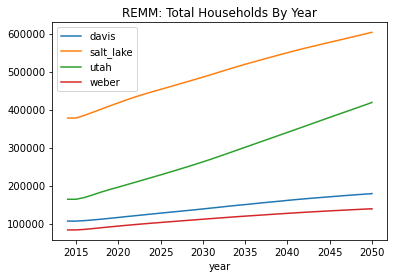

In [4]:
df = create_county_dataframe('TOTHH')
df.set_index('year').plot(title='REMM: Total Households By Year')

### Total Population

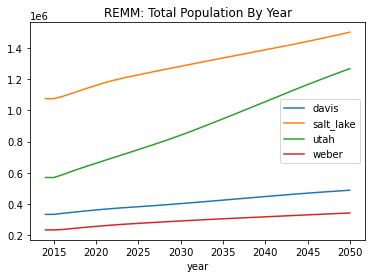

In [5]:
df = create_county_dataframe('HHPOP')
df.set_index('year').plot(title='REMM: Total Population By Year')

### Total Jobs

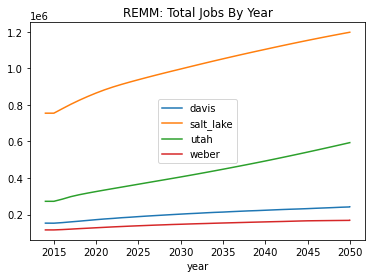

In [6]:
df = create_county_dataframe('TOTEMP')
df.set_index('year').plot(title='REMM: Total Jobs By Year')

# Capacity Scenario

In [7]:
inputs = r'.\inputs_capacity'

### Total Households

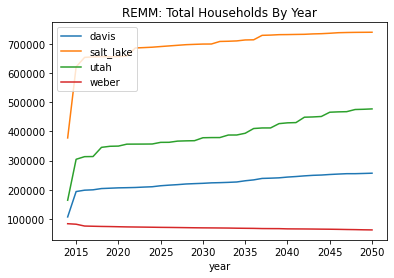

In [8]:
df = create_county_dataframe('TOTHH')
df.set_index('year').plot(title='REMM: Total Households By Year')

In [9]:
df

,year,davis,salt_lake,utah,weber
0,2014,106535.0,377727.0,163909.0,83221.0
1,2015,193647.0,621686.0,304422.0,81501.0
2,2016,198335.0,654274.0,313450.0,75244.0
3,2017,199613.0,655900.0,313878.0,74519.0
4,2018,203939.0,656921.0,345419.0,73860.0
5,2019,205139.0,656326.0,349054.0,73439.0
6,2020,206352.0,656974.0,349733.0,72835.0
7,2021,206913.0,659186.0,356392.0,72244.0
8,2022,207621.0,686613.0,356555.0,71897.0
9,2023,208992.0,687879.0,356660.0,71544.0


### Total Population

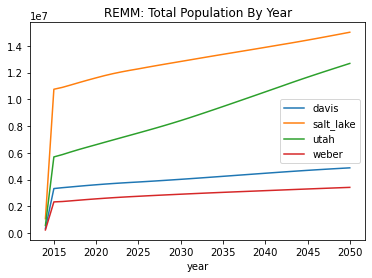

In [10]:
df = create_county_dataframe('HHPOP')
df.set_index('year').plot(title='REMM: Total Population By Year')

### Total Jobs

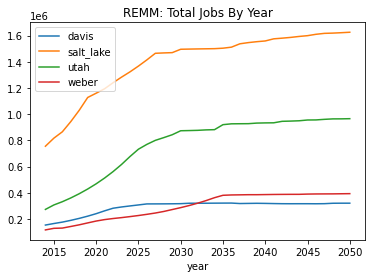

In [11]:
df = create_county_dataframe('TOTEMP')
df.set_index('year').plot(title='REMM: Total Jobs By Year')